In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #biblioteca de machine learning en Python

In [2]:
J=np.pi*(4.5/1000)**4/2
L=(94.643/1000)

In [3]:
df1=pd.read_excel(r"Datos\Torsión_K15-02-2022_y_J17-02-2022_FísicaExperimental.ods",decimal=",")
df1.head()

Ángulo de torsión en deg  Momento de torsión en Nm
0                       1.0                      0.22
1                       2.0                      0.03
2                       3.0                      0.13
3                       4.1                      0.32
4                       5.1                      1.03

In [4]:
df1.columns

Index(['Ángulo de torsión en deg', 'Momento de torsión en Nm'], dtype='object')

In [5]:
x1=df1['Ángulo de torsión en deg'].values
y1=df1['Momento de torsión en Nm'].values

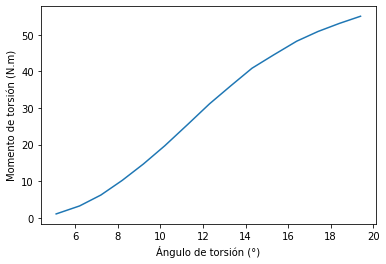

In [6]:
plt.plot(x1[np.where((x1<20)&(x1>5))],y1[np.where((x1<20)&(x1>5))])
plt.xlabel("Ángulo de torsión (°)")
plt.ylabel("Momento de torsión (N.m)")
plt.show()

In [7]:
y1=y1[np.where((x1<20)&(x1>5))].reshape(-1,1)/J
x1=x1[np.where((x1<20)&(x1>5))].reshape(-1,1)/L*np.pi/180

In [8]:
rl=LinearRegression()
rl.fit(x1,y1)
rl.score(x1,y1),rl.coef_/1e6

(0.9879086445799422, array([[35226.15897269]]))

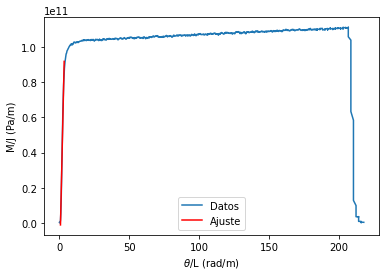

In [9]:
plt.plot(df1['Ángulo de torsión en deg'].values/L*np.pi/180,df1['Momento de torsión en Nm'].values/J)
plt.plot(x1,rl.predict(x1),color="red")
plt.xlabel(r"$\theta/$L (rad/m)")
plt.ylabel("M/J (Pa/m)")
plt.legend(["Datos","Ajuste"])
plt.show()

In [10]:
df2=pd.read_excel(r"Datos\Torsión_K15-02-2022_y_J17-02-2022_FísicaExperimental.ods",decimal=",",sheet_name=1)
df2.head()

Ángulo de torsión en deg  Momento de torsión en Nm
0                       1.0                      1.57
1                       2.0                      2.38
2                       3.0                      3.10
3                       4.1                      3.63
4                       5.1                      4.56

In [11]:
df2.columns

Index(['Ángulo de torsión en deg', 'Momento de torsión en Nm'], dtype='object')

In [12]:
x2=df2['Ángulo de torsión en deg'].values
y2=df2['Momento de torsión en Nm'].values

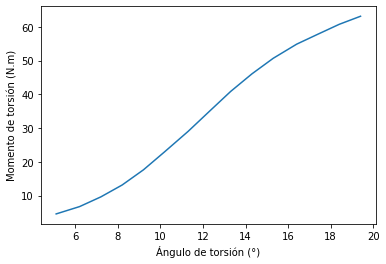

In [13]:
plt.plot(x2[np.where((x2<20)&(x2>5))],y2[np.where((x2<20)&(x2>5))])
plt.xlabel("Ángulo de torsión (°)")
plt.ylabel("Momento de torsión (N.m)")
plt.show()

In [14]:
y2=y2[np.where((x2<20)&(x2>5))].reshape(-1,1)/J
x2=x2[np.where((x2<20)&(x2>5))].reshape(-1,1)/L*np.pi/180

In [15]:
rl=LinearRegression()
rl.fit(x2,y2)
rl.score(x2,y2),rl.coef_/1e6

(0.9894116906404531, array([[38295.10641404]]))

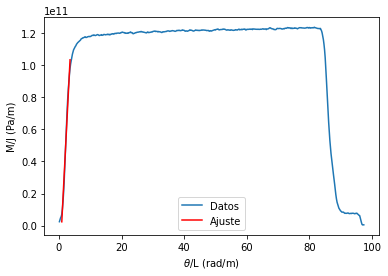

In [16]:
plt.plot(df2['Ángulo de torsión en deg'].values/L*np.pi/180,df2['Momento de torsión en Nm'].values/J)
plt.plot(x2,rl.predict(x2),color="red")
plt.xlabel(r"$\theta/$L (rad/m)")
plt.ylabel("M/J (Pa/m)")
plt.legend(["Datos","Ajuste"])
plt.show()

In [17]:
df3=pd.read_excel(r"Datos\Torsión_K15-02-2022_y_J17-02-2022_FísicaExperimental.ods",decimal=",",sheet_name=2)
df3.head()

Ángulo de torsión en deg  Momento de torsión en Nm
0                       1.0                      0.45
1                       2.0                      0.48
2                       3.0                      0.53
3                       4.1                      0.81
4                       5.1                      1.75

In [18]:
x3=df3['Ángulo de torsión en deg'].values
y3=df3['Momento de torsión en Nm'].values

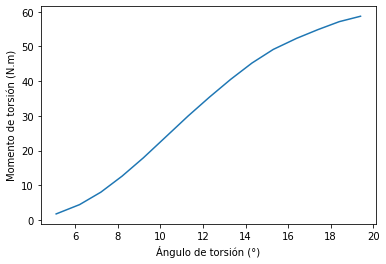

In [19]:
plt.plot(x3[np.where((x3<20)&(x3>5))],y3[np.where((x3<20)&(x3>5))])
plt.xlabel("Ángulo de torsión (°)")
plt.ylabel("Momento de torsión (N.m)")
plt.show()

In [20]:
y3=y3[np.where((x3<20)&(x3>5))].reshape(-1,1)/J
x3=x3[np.where((x3<20)&(x3>5))].reshape(-1,1)/L*np.pi/180

In [21]:
rl=LinearRegression()
rl.fit(x3,y3)
rl.score(x3,y3),rl.coef_/1e6

(0.9834884792040582, array([[37004.32792663]]))

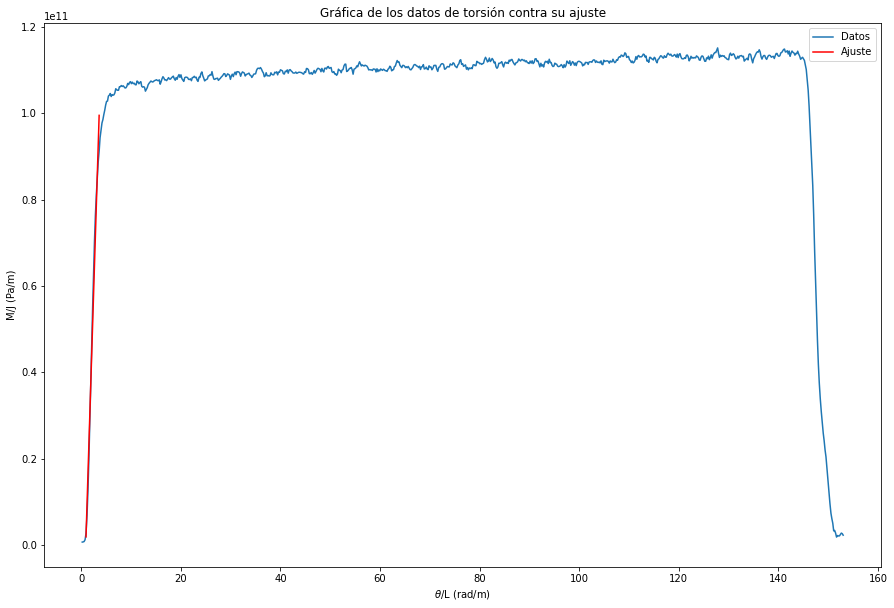

In [22]:
plt.figure(figsize=(15,10))
plt.plot(df3['Ángulo de torsión en deg'].values/L*np.pi/180,df3['Momento de torsión en Nm'].values/J)
plt.plot(x3,rl.predict(x3),color="red")
plt.xlabel(r"$\theta/$L (rad/m)")
plt.ylabel("M/J (Pa/m)")
plt.legend(["Datos","Ajuste"])
plt.title("Gráfica de los datos de torsión contra su ajuste")
plt.show()

In [23]:
X=np.concatenate([x1,x2,x3],axis=0)
Y=np.concatenate([y1,y2,y3],axis=0)

In [24]:
rl=LinearRegression()
rl.fit(X,Y)
rl.score(X,Y)

0.9751048905863119

In [25]:
rl.coef_/1e6

array([[36841.86443778]])

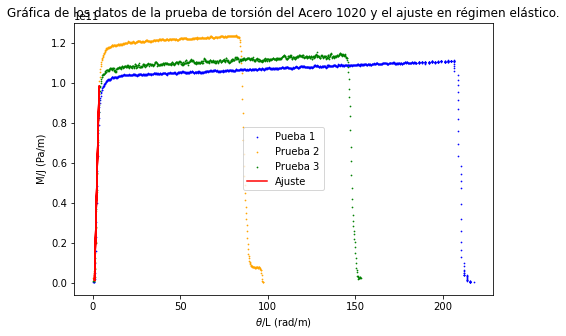

In [26]:
plt.figure(figsize=(7.5,5))
plt.scatter(df1['Ángulo de torsión en deg'].values/L*np.pi/180,df1['Momento de torsión en Nm'].values/J,s=2,marker=".",color="blue")
plt.scatter(df2['Ángulo de torsión en deg'].values/L*np.pi/180,df2['Momento de torsión en Nm'].values/J,s=2,marker=".",color="orange")
plt.scatter(df3['Ángulo de torsión en deg'].values/L*np.pi/180,df3['Momento de torsión en Nm'].values/J,s=2,marker=".",color="green")
plt.plot(X,rl.predict(X),color="red")
plt.xlabel(r"$\theta/$L (rad/m)")
plt.ylabel("M/J (Pa/m)")
plt.legend(["Pueba 1","Prueba 2","Prueba 3","Ajuste"])
plt.title("Gráfica de los datos de la prueba de torsión del Acero 1020 y el ajuste en régimen elástico.")
plt.show()

In [27]:
syx=np.sqrt(np.sum((rl.predict(X)-Y)**2)/(len(X)-2))
scoef=syx/np.sqrt(np.sum((X-X.mean())**2))
sint=syx*np.sqrt(np.sum(X**2)/(len(X)*np.sum((X-X.mean())**2)))

In [28]:
scoef/1e6,sint/1e6

(897.7155020080058, 2159.896234466772)

In [29]:
from scipy.stats import t

In [30]:
t.ppf(0.9545,len(X)-2)*scoef/1e6,t.ppf(0.9545,len(X)-2)*sint/1e6

(1552.0687824133029, 3734.2649327871636)